<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/Apple_Stock_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('apple_5yr_one.csv')
df.head(11)

,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400
5,2020-06-10,85.74620819091797,86.21522971767824,84.1058417038533,84.54570234634012,166651600
6,2020-06-11,81.6294937133789,85.3136361549305,81.5274306203534,84.88835596262886,201662400
7,2020-06-12,82.33426666259766,84.52142258544907,81.22125057836313,83.77293248835645,200146000
8,2020-06-15,83.35250091552734,84.00621804239414,80.82268994587284,80.98551479918848,138808800
9,2020-06-16,85.56153106689453,85.83371668323046,83.7729272287711,85.41086152161019,165428800


In [4]:
df.tail(11)

,Date,Close,High,Low,Open,Volume
1245,2025-05-16,211.25999450683594,212.57000732421875,209.77000427246094,212.36000061035156,54737900
1246,2025-05-19,208.77999877929688,209.47999572753906,204.25999450683594,207.91000366210938,46140500
1247,2025-05-20,206.86000061035156,208.47000122070312,205.02999877929688,207.6699981689453,42496600
1248,2025-05-21,202.08999633789062,207.0399932861328,200.7100067138672,205.1699981689453,59211800
1249,2025-05-22,201.36000061035156,202.75,199.6999969482422,200.7100067138672,46742400
1250,2025-05-23,195.27000427246094,197.6999969482422,193.4600067138672,193.6699981689453,78432900
1251,2025-05-27,200.2100067138672,200.74000549316406,197.42999267578125,198.3000030517578,56288500
1252,2025-05-28,200.4199981689453,202.72999572753906,199.89999389648438,200.58999633789062,45339700
1253,2025-05-29,199.9499969482422,203.80999755859375,198.50999450683594,203.5800018310547,51396800
1254,2025-05-30,200.85000610351562,201.9600067138672,196.77999877929688,199.3699951171875,70819900


In [5]:
df.shape

(1256, 6)

In [6]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [7]:
df.dtypes

,0
Date,object
Close,object
High,object
Low,object
Open,object
Volume,object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1255 non-null   object
 1   Close   1256 non-null   object
 2   High    1256 non-null   object
 3   Low     1256 non-null   object
 4   Open    1256 non-null   object
 5   Volume  1256 non-null   object
dtypes: object(6)
memory usage: 59.0+ KB


In [11]:
df.isnull().sum()

,0
Date,1
Close,0
High,0
Low,0
Open,0
Volume,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe(include = 'all')

,Date,Close,High,Low,Open,Volume
count,1255,1256,1256,1256,1256,1256
unique,1255,1241,1256,1256,1256,1254
top,2025-06-02,223.69039916992188,202.1300048828125,200.1199951171875,200.27999877929688,97918500
freq,1,2,1,1,1,2


# Handling Outliers

In [15]:
df['Open'] = pd.to_numeric(df['Open'], errors = 'coerce' )

Q1 = df['Open'].quantile(0.25)
Q3 = df['Open'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outliers = df[(df['Open'] >= lower_bound)& (df['Open'] <= upper_bound)]

print('Before removing outliers:', len(df))
print('After removing outliers:', len(df_outliers))

Before removing outliers: 1256
After removing outliers: 1255


# Univariate Analysis

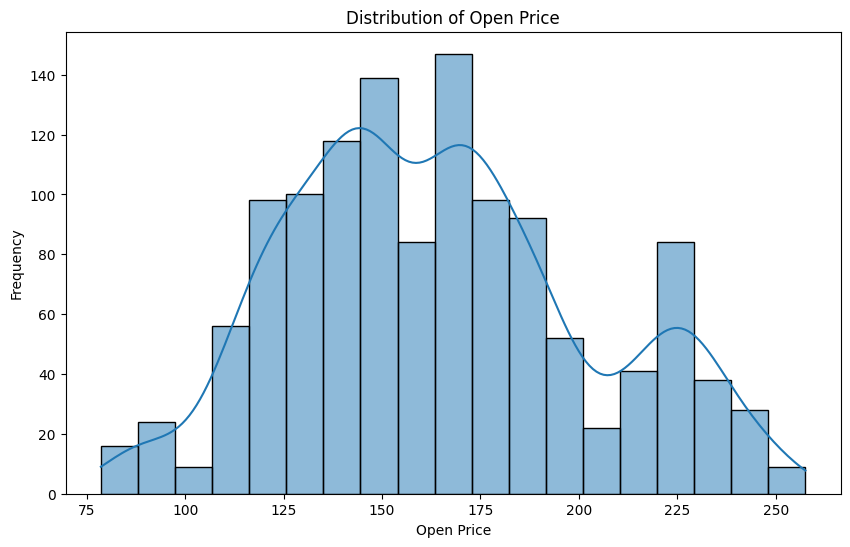

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), kde=True)
plt.title('Distribution of Open Price')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.show()

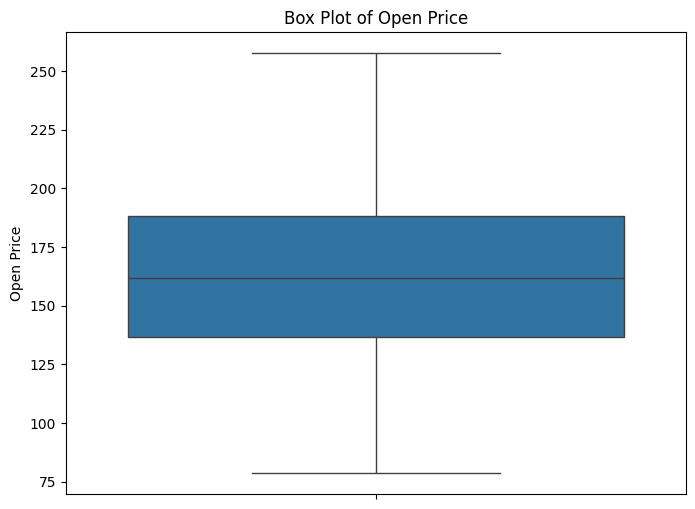

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Open'].dropna())
plt.title('Box Plot of Open Price')
plt.ylabel('Open Price')
plt.show()

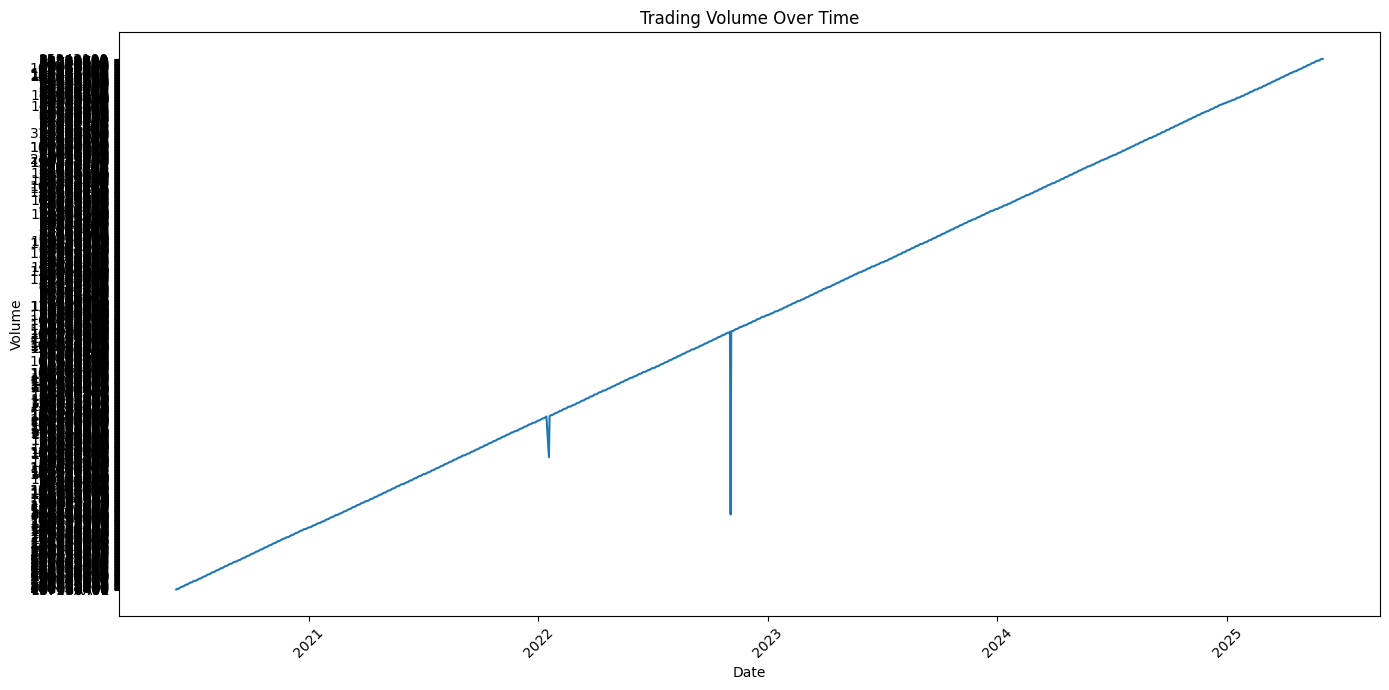

In [19]:
plt.figure(figsize=(14, 7))
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'], df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

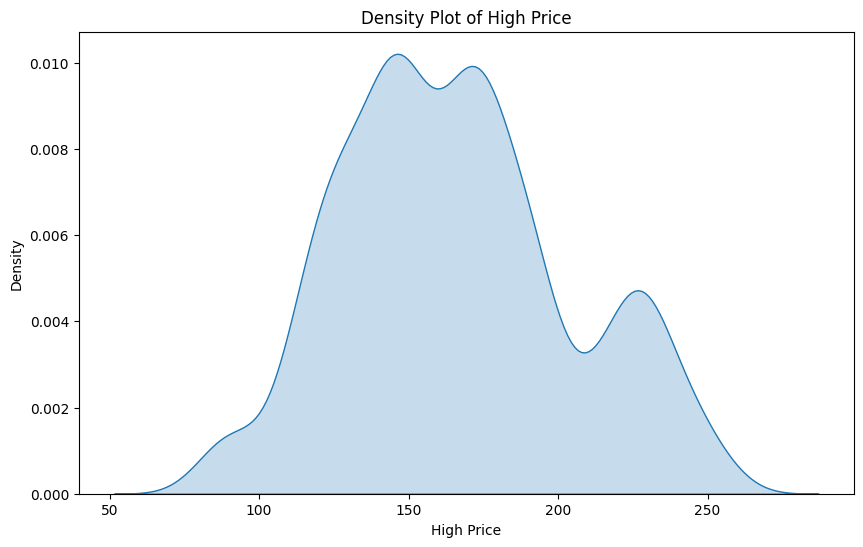

In [21]:
plt.figure(figsize=(10, 6))
# Convert the 'High' column to numeric, coercing errors to NaN
df['High'] = pd.to_numeric(df['High'], errors='coerce')
# Drop any resulting NaN values and then plot
sns.kdeplot(df['High'].dropna(), fill=True)
plt.title('Density Plot of High Price')
plt.xlabel('High Price')
plt.ylabel('Density')
plt.show()

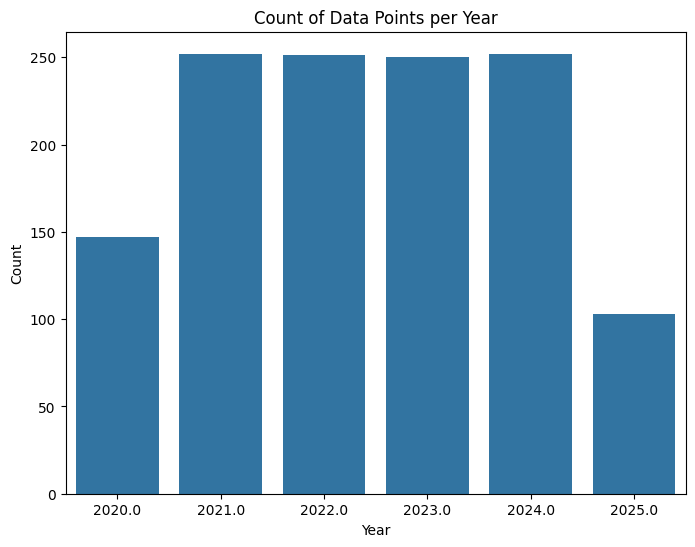

In [23]:
# Assuming 'Date' is converted to datetime
df['Year'] = pd.to_datetime(df['Date']).dt.year
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Year'])
plt.title('Count of Data Points per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

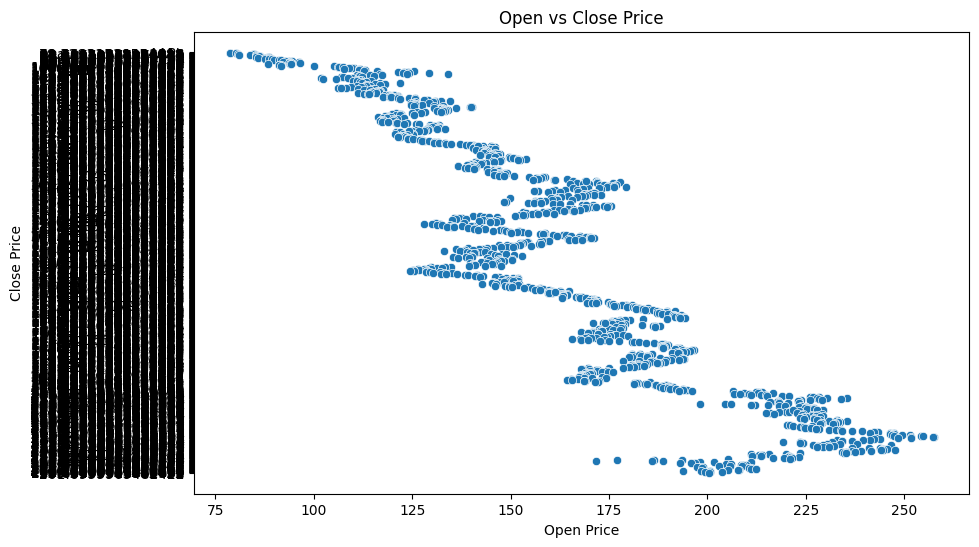

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Open'], y=df['Close'])
plt.title('Open vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

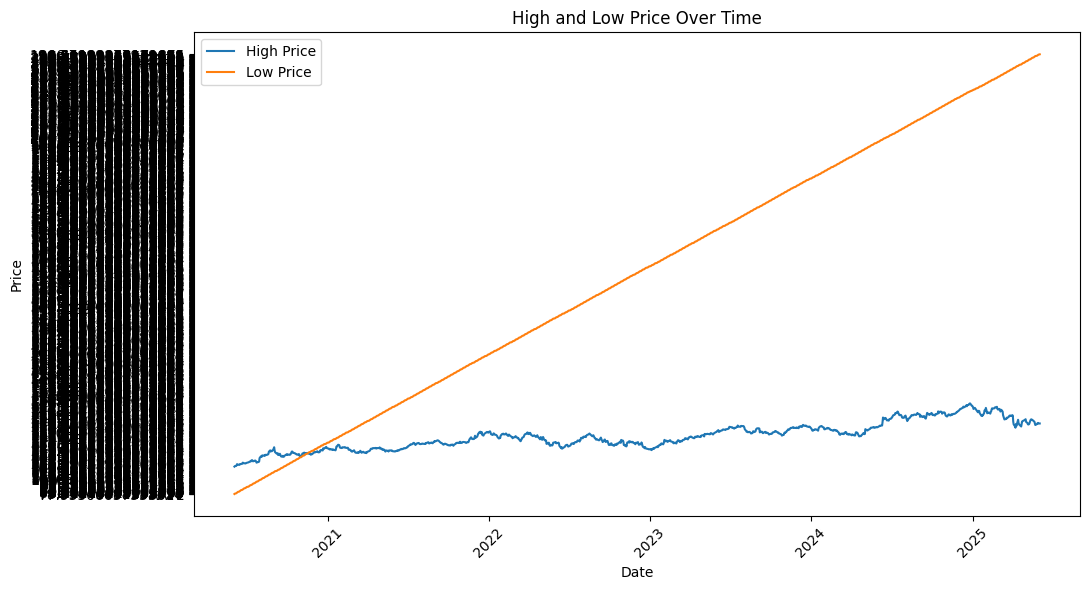

In [30]:
plt.figure(figsize=(11, 6))
plt.plot(df['Date'], df['High'], label='High Price')
plt.plot(df['Date'], df['Low'], label='Low Price')
plt.title('High and Low Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

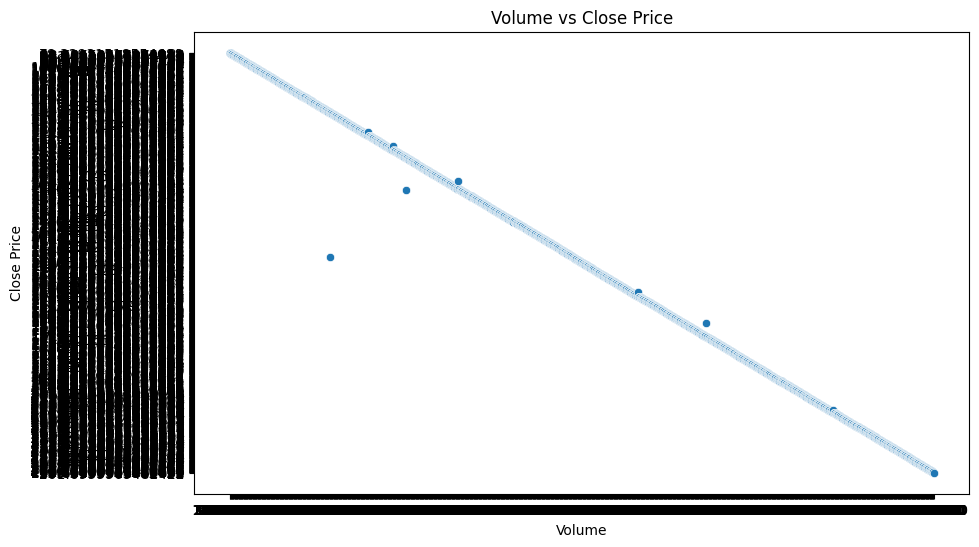

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Volume'], y=df['Close'])
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

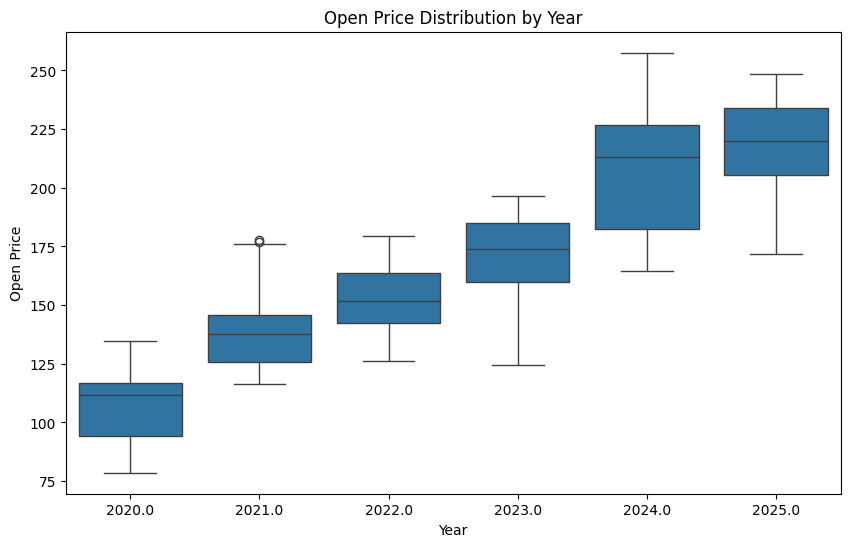

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Year'], y=df['Open'])
plt.title('Open Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Open Price')
plt.show()

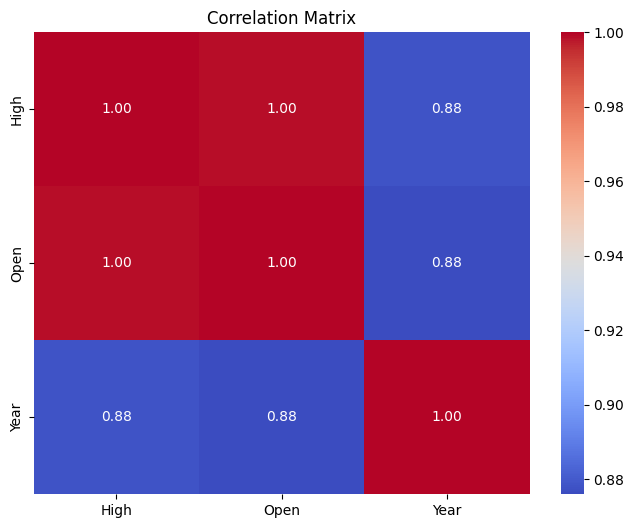

In [25]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Thank you